### THIS CODE AN BE USED FOR ANY STRATEGY TO BE BACKTESTED JUST CHANGE THE INDICATORS ###

In [1]:
import sys
sys.path.append("../")
import pandas as pd
import plotly.graph_objects as go
from technicals.indicators import RSI
from technicals.patterns import apply_patterns
from ploting import CandlePlot
import datetime as dt

In [2]:
df_raw=pd.read_pickle("../data/EUR_USD_H1.pkl")

In [3]:
df_raw.shape

(35658, 14)

In [4]:
df_an=df_raw.copy()#iloc[-6000:].copy()
df_an.reset_index(drop=True,inplace=True)


In [5]:
df_an=RSI(df_an)

In [6]:
df_an.tail()

,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,RSI_14
35653,2021-12-30 19:00:00+00:00,1063,1.13058,1.13298,1.13043,1.13274,1.13052,1.13291,1.13036,1.13267,1.13065,1.13306,1.13049,1.13280,51.407635
35654,2021-12-30 20:00:00+00:00,1092,1.13272,1.13304,1.13185,1.13193,1.13264,1.13297,1.13177,1.13186,1.13279,1.13311,1.13192,1.13200,48.671929
35655,2021-12-30 21:00:00+00:00,388,1.13195,1.13276,1.13194,1.13258,1.13188,1.13269,1.13187,1.13249,1.13202,1.13283,1.13201,1.13267,50.928675
35656,2021-12-30 22:00:00+00:00,118,1.13252,1.13264,1.13222,1.13230,1.13204,1.13236,1.13182,1.13218,1.13299,1.13299,1.13236,1.13243,49.910668
35657,2021-12-30 23:00:00+00:00,507,1.13227,1.13258,1.13190,1.13224,1.13214,1.13251,1.13183,1.13216,1.13240,1.13266,1.13198,1.13231,49.681497


In [7]:
df_an=apply_patterns(df_an)

In [8]:
df_an["EMA_200"]=df_an.mid_c.ewm(span=200,min_periods=200).mean()

In [9]:
df_an.columns

Index(['time', 'volume', 'mid_o', 'mid_h', 'mid_l', 'mid_c', 'bid_o', 'bid_h',
       'bid_l', 'bid_c', 'ask_o', 'ask_h', 'ask_l', 'ask_c', 'RSI_14',
       'body_lower', 'body_upper', 'body_bottom_perc', 'body_upper_perc',
       'body_perc', 'direction', 'body_size', 'low_change', 'high_change',
       'body_size_change', 'mid_point', 'mid_point_prev_2', 'body_size_prev',
       'direction_prev', 'direction_prev_2', 'body_perc_prev',
       'body_perc_prev_2', 'HANGING_MAN', 'SHOOTING_STAR', 'SPINNING_TOP',
       'MARUBOZU', 'ENGULFING', 'TWEEZER_TOP', 'TWEEZER_BOTTOM',
       'MORNING_STAR', 'EVENING_STAR', 'EMA_200'],
      dtype='object')

In [19]:
our_cols=['time', 'mid_o', 'mid_h', 'mid_l', 'mid_c','bid_o', 'bid_h',
       'bid_l', 'bid_c', 'ask_o', 'ask_h', 'ask_l', 'ask_c','ENGULFING', 'EMA_200', 'direction','RSI_14']

In [22]:
df_slim=df_an[our_cols].copy()


In [23]:

df_slim.dropna(inplace=True)
df_slim.reset_index(drop=True,inplace=True)

In [24]:
df_slim.head()

,time,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,ENGULFING,EMA_200,direction,RSI_14
0,2016-04-19 07:00:00+00:00,1.13388,1.13406,1.13254,1.13270,1.13380,1.13399,1.13247,1.13262,1.13396,1.13413,1.13261,1.13279,False,1.132002,-1,59.865758
1,2016-04-19 08:00:00+00:00,1.13267,1.13335,1.13149,1.13326,1.13260,1.13327,1.13143,1.13306,1.13274,1.13363,1.13155,1.13347,False,1.132016,1,62.890585
2,2016-04-19 09:00:00+00:00,1.13334,1.13434,1.13258,1.13316,1.13314,1.13427,1.13251,1.13310,1.13354,1.13440,1.13266,1.13322,False,1.132029,-1,61.992084
3,2016-04-19 10:00:00+00:00,1.13312,1.13390,1.13277,1.13344,1.13306,1.13383,1.13270,1.13336,1.13319,1.13397,1.13283,1.13351,False,1.132046,1,63.561839
4,2016-04-19 14:00:00+00:00,1.13773,1.13827,1.13600,1.13768,1.13766,1.13821,1.13593,1.13761,1.13780,1.13833,1.13606,1.13775,False,1.132234,-1,78.618041


In [25]:
BUY=1
SELL=-1
NONE=0
RSI_LIMIT=50.0

def apply_signal(row):
    if row.ENGULFING==True:
        if row.direction==BUY and row.mid_l>row.EMA_200:
            if row.RSI_14> RSI_LIMIT:
                return BUY
        if row.direction==SELL and row.mid_h<row.EMA_200:
            if row.RSI_14< RSI_LIMIT:
                return SELL
    else:
        return NONE
        
                

In [26]:
df_slim["SIGNAL"]=df_slim.apply(apply_signal, axis=1)

In [27]:
df_slim["SIGNAL"].value_counts()

SIGNAL
 0.0    12390
-1.0     1150
 1.0     1112
Name: count, dtype: int64

In [37]:
LOSS_FACTOR=-1.0
PROFIT_FACTOR=1.5

def apply_take_profit(row):
    if row.SIGNAL != NONE:
        if row.SIGNAL==BUY:
            return (row.ask_c-row.ask_o)* PROFIT_FACTOR + row.ask_c
        else:
            return (row.bid_c-row.bid_o)* PROFIT_FACTOR + row.bid_c
    else:
        return 0.0

def apply_stop_loss(row):
    if row.SIGNAL != NONE:
        if row.SIGNAL==BUY:
             return row.ask_o
        else:
            return row.bid_o
            
       
    else:
        return 0.0



In [38]:
df_slim["TAKE_PROFIT"]=df_slim.apply(apply_take_profit, axis=1)
df_slim["STOP_LOSS"]=df_slim.apply(apply_stop_loss, axis=1)


In [39]:
df_slim[df_slim.SIGNAL==SELL].head()


,time,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,ENGULFING,EMA_200,direction,RSI_14,SIGNAL,TAKE_PROFIT,STOP_LOSS
16,2016-04-21 00:00:00+00:00,1.13028,1.13038,1.12968,1.12990,1.13021,1.13030,1.12962,1.12983,1.13035,1.13046,1.12975,1.12997,True,1.132924,-1,30.870521,-1.0,1.129260,1.13021
18,2016-04-21 03:00:00+00:00,1.12987,1.13004,1.12954,1.12958,1.12981,1.12997,1.12947,1.12952,1.12993,1.13010,1.12961,1.12965,True,1.132821,-1,30.295427,-1.0,1.129085,1.12981
20,2016-04-21 07:00:00+00:00,1.12980,1.13105,1.12890,1.12922,1.12973,1.13098,1.12883,1.12916,1.12987,1.13112,1.12896,1.12929,True,1.132679,-1,31.502812,-1.0,1.128305,1.12973
36,2016-04-25 00:00:00+00:00,1.12316,1.12380,1.12233,1.12272,1.12308,1.12371,1.12224,1.12265,1.12325,1.12388,1.12242,1.12279,True,1.130722,-1,32.608873,-1.0,1.122005,1.12308
42,2016-04-25 12:00:00+00:00,1.12576,1.12673,1.12488,1.12505,1.12569,1.12667,1.12480,1.12498,1.12582,1.12680,1.12495,1.12512,True,1.130021,-1,49.347051,-1.0,1.123915,1.12569


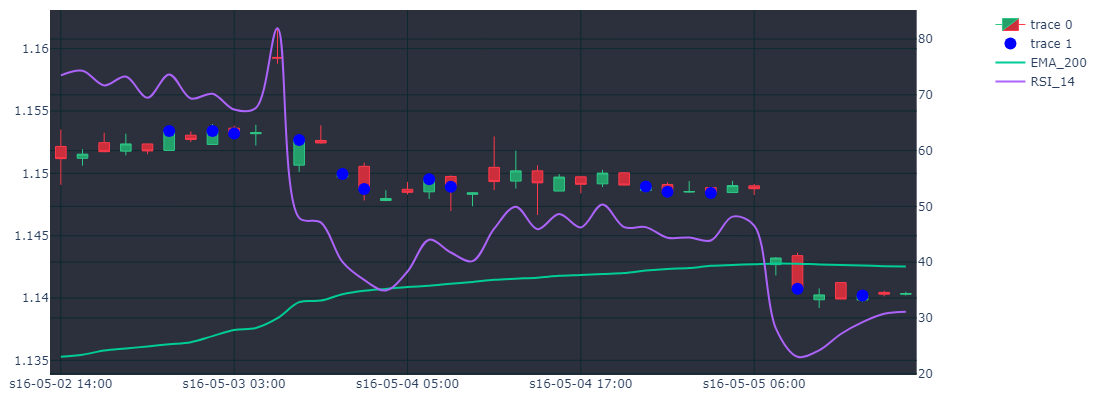

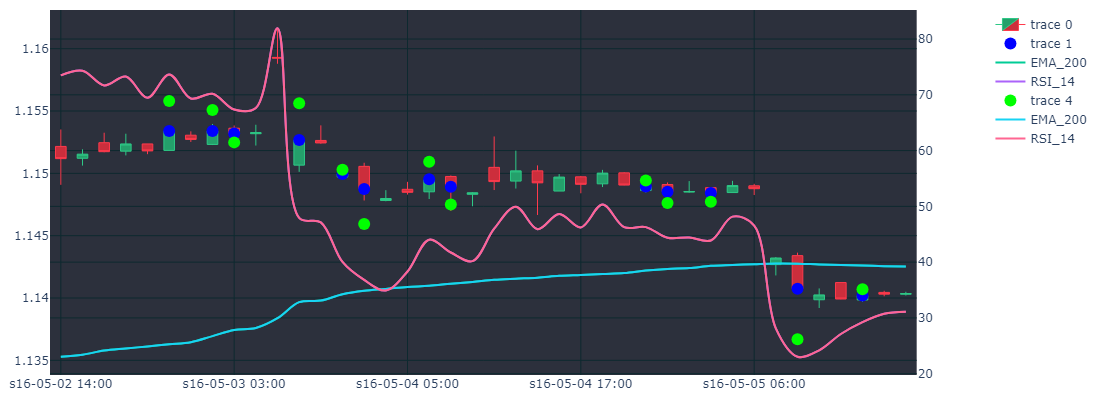

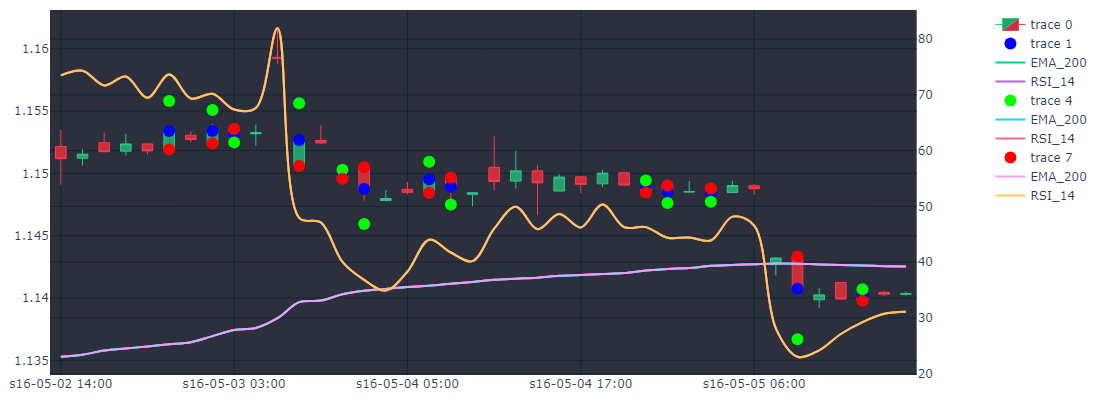

In [40]:
df_plot=df_slim.iloc[100:140]
cp=CandlePlot(df_plot, candles=True)

trades=cp.df_plot[df_plot.SIGNAL != NONE]
markers=['mid_c','TAKE_PROFIT',"STOP_LOSS"]
marker_colors=["#0000FF","#00FF00","#ff0000"]
for i in range(3):
    cp.fig.add_trace(go.Scatter(
        x=trades.sTime,
        y=trades[markers[i]],
        mode='markers',
        marker=dict(color=marker_colors[i],size=12)
        
    ))
    cp.show_plot(line_traces=["EMA_200"],sec_traces=["RSI_14"])

In [58]:
class Trade:
    def __init__(self,row):
        self.running=True
        self.start_index=row.name
        if row.SIGNAL== BUY:
            self.start_price=row.ask_c
            self.trigger_price=row.ask_c

        if row.SIGNAL== SELL:
            self.start_price=row.bid_c
            self.trigger_price=row.bid_c
            
        
        
        self.SIGNAL=row.SIGNAL
        self.TAKE_PROFIT=row.TAKE_PROFIT
        self.STOP_LOSS=row.STOP_LOSS
        self.result=0.0
        self.end_time=row.time
        self.start_time=row.time
        self.duration=0

    
    def close_trade(self,row,result,trigger_price):
        self.running=False
        self.result=result 
        self.end_time=row.time
        self.trigger_price=trigger_price
        
    
    
    def update(self,row):
        self.duration+=1
        if self.SIGNAL == BUY:
            if row.bid_h>=self.TAKE_PROFIT:
                self.close_trade(row,PROFIT_FACTOR,row.bid_h)
                
            elif row.bid_l<=self.STOP_LOSS:
                self.close_trade(row,LOSS_FACTOR,row.bid_l)

             # if row.bid_l<=self.STOP_LOSS:
             #    self.close_trade(row,LOSS_FACTOR,row.bid_l)
                
             # elif  row.bid_h>=self.TAKE_PROFIT:
             #    self.close_trade(row,PROFIT_FACTOR,row.bid_h)
                

        if self.SIGNAL == SELL:
            if row.ask_l<=self.TAKE_PROFIT:
                self.close_trade(row,PROFIT_FACTOR,row.ask_l)
                
            elif row.ask_h>=self.STOP_LOSS:
                self.close_trade(row,LOSS_FACTOR,row.ask_h)


            # if  row.mid_l>=self.STOP_LOSS:
            #     self.close_trade(row,LOSS_FACTOR,row.mid_h)
                
            # elif row.mid_h<=self.TAKE_PROFIT:
            #     self.close_trade(row,PROFIT_FACTOR,row.mid_l)
            



In [59]:
open_trades=[]
closed_trades=[]
for index, row in df_slim.iterrows():
    for ot in open_trades:
        ot.update(row)
        if ot.running==False:
            closed_trades.append(ot)
    open_trades=[x for x in open_trades if x.running==True]

    if row.SIGNAL!=NONE:
        open_trades.append(Trade(row))
    
        

In [60]:
df_results=pd.DataFrame.from_dict([vars(x) for x in closed_trades])
df_results.sort_values(by="start_index",inplace=True)

In [61]:
df_results.result.sum()

-174.5

In [62]:
df_m5=pd.read_pickle("../data/EUR_USD_M5.pkl")

In [93]:
df_m5_slim=df_m5[['time','bid_h','bid_l','ask_h','ask_l']].copy()
df_m5_slim.head()

,time,bid_h,bid_l,ask_h,ask_l
0,2016-04-07 00:00:00+00:00,1.14011,1.13978,1.14026,1.13995
1,2016-04-07 00:05:00+00:00,1.14057,1.14010,1.14073,1.14025
2,2016-04-07 00:10:00+00:00,1.14047,1.14028,1.14063,1.14041
3,2016-04-07 00:15:00+00:00,1.14056,1.14025,1.14071,1.14040
4,2016-04-07 00:20:00+00:00,1.14061,1.14040,1.14076,1.14054


In [107]:
df_signals=df_slim[df_slim.SIGNAL != NONE].copy()


In [108]:
df_signals['m5_start']=[x+ dt.timedelta(hours=1) for x in df_signals.time]

In [109]:
df_signals['start_index_h1']=df_signals.index

In [110]:
df_signals.columns

Index(['time', 'mid_o', 'mid_h', 'mid_l', 'mid_c', 'bid_o', 'bid_h', 'bid_l',
       'bid_c', 'ask_o', 'ask_h', 'ask_l', 'ask_c', 'ENGULFING', 'EMA_200',
       'direction', 'RSI_14', 'SIGNAL', 'TAKE_PROFIT', 'STOP_LOSS', 'm5_start',
       'start_index_h1'],
      dtype='object')

In [111]:
df_signals.drop(['time', 'mid_o', 'mid_h', 'mid_l', 'mid_c', 'bid_o', 'bid_h', 'bid_l',
        'ask_o', 'ask_h', 'ask_l', 'ENGULFING', 'EMA_200',
       'direction', 'RSI_14'
       ],axis=1, inplace=True)

In [112]:
df_signals.rename(columns={
'bid_c':'start_price_BUY',
    'ask_c':'start_price_SELL',
'm5_start':'time'
    
},inplace=True)

In [113]:
merged=pd.merge(left=df_m5_slim, right=df_signals,on='time',how='left')

In [114]:
merged[merged.SIGNAL.isna()==False].head()
merged.fillna(0,inplace=True)
merged.SIGNAL=merged.SIGNAL.astype(int)
merged.start_index_h1=merged.start_index_h1.astype(int)

In [115]:
merged.head()

,time,bid_h,bid_l,ask_h,ask_l,start_price_BUY,start_price_SELL,SIGNAL,TAKE_PROFIT,STOP_LOSS,start_index_h1
0,2016-04-07 00:00:00+00:00,1.14011,1.13978,1.14026,1.13995,0.0,0.0,0,0.0,0.0,0
1,2016-04-07 00:05:00+00:00,1.14057,1.14010,1.14073,1.14025,0.0,0.0,0,0.0,0.0,0
2,2016-04-07 00:10:00+00:00,1.14047,1.14028,1.14063,1.14041,0.0,0.0,0,0.0,0.0,0
3,2016-04-07 00:15:00+00:00,1.14056,1.14025,1.14071,1.14040,0.0,0.0,0,0.0,0.0,0
4,2016-04-07 00:20:00+00:00,1.14061,1.14040,1.14076,1.14054,0.0,0.0,0,0.0,0.0,0


In [118]:
class TradeM5:
    def __init__(self,row):
        self.running=True
        self.start_index_m5=row.name
        if row.SIGNAL== BUY:
            self.start_price=row.start_price_BUY	
            self.trigger_price=row.start_price_BUY	

        if row.SIGNAL== SELL:
            self.start_price=row.start_price_SELL
            self.trigger_price=row.start_price_SELL
        
        self.start_index_h1=row.start_index_h1
        
        self.SIGNAL=row.SIGNAL
        self.TAKE_PROFIT=row.TAKE_PROFIT
        self.STOP_LOSS=row.STOP_LOSS
        self.result=0.0
        self.end_time=row.time
        self.start_time=row.time
        self.duration=1

    
    def close_trade(self,row,result,trigger_price):
        self.running=False
        self.result=result 
        self.end_time=row.time
        self.trigger_price=trigger_price
        
    
    
    def update(self,row):
        self.duration+=1
        if self.SIGNAL == BUY:
            if row.bid_h>=self.TAKE_PROFIT:
                self.close_trade(row,PROFIT_FACTOR,row.bid_h)
                
            elif row.bid_l<=self.STOP_LOSS:
                self.close_trade(row,LOSS_FACTOR,row.bid_l)

             # if row.mid_l<=self.STOP_LOSS:
             #    self.close_trade(row,LOSS_FACTOR,row.mid_l)
                
             # elif  row.mid_h>=self.TAKE_PROFIT:
             #    self.close_trade(row,PROFIT_FACTOR,row.mid_h)
                

        if self.SIGNAL == SELL:
            if row.ask_l<=self.TAKE_PROFIT:
                self.close_trade(row,PROFIT_FACTOR,row.ask_l)
                
            elif row.ask_h>=self.STOP_LOSS:
                self.close_trade(row,LOSS_FACTOR,row.ask_h)


            # if  row.mid_l>=self.STOP_LOSS:
            #     self.close_trade(row,LOSS_FACTOR,row.mid_h)
                
            # elif row.mid_h<=self.TAKE_PROFIT:
            #     self.close_trade(row,PROFIT_FACTOR,row.mid_l)
            



In [119]:
open_trades_m5=[]
closed_trades_m5=[]
for index, row in merged.iterrows():
    if row.SIGNAL!=NONE:
        open_trades_m5.append(TradeM5(row))
        
    for ot in open_trades_m5:
        ot.update(row)
        if ot.running==False:
            closed_trades_m5.append(ot)
    open_trades_m5 = [x for x in open_trades_m5 if x.running==True]

    
    

In [121]:
len(closed_trades_m5)

2246

In [122]:
df_res_m5=pd.DataFrame.from_dict([vars(x) for x in closed_trades_m5])


In [123]:
df_res_m5.head()

,running,start_index_m5,start_price,trigger_price,start_index_h1,SIGNAL,TAKE_PROFIT,STOP_LOSS,result,end_time,start_time,duration
0,False,2612,1.13664,1.13563,9,1,1.138220,1.13582,-1.0,2016-04-20 03:50:00+00:00,2016-04-20 02:00:00+00:00,24
1,False,2732,1.13776,1.13676,13,1,1.139520,1.13682,-1.0,2016-04-20 12:05:00+00:00,2016-04-20 12:00:00+00:00,3
2,False,2888,1.12997,1.13023,16,-1,1.129260,1.13021,-1.0,2016-04-21 01:00:00+00:00,2016-04-21 01:00:00+00:00,2
3,False,2924,1.12965,1.12900,18,-1,1.129085,1.12981,1.5,2016-04-21 05:15:00+00:00,2016-04-21 04:00:00+00:00,17
4,False,2972,1.12929,1.12986,20,-1,1.128305,1.12973,-1.0,2016-04-21 08:10:00+00:00,2016-04-21 08:00:00+00:00,4


In [124]:
df_res_m5.result.sum()

-596.0